In [7]:
import pandas as pd
from matplotlib_venn import venn3, venn3_circles
import os
import json
from matplotlib import pyplot as plt


In [8]:
# load the config files and the variables from the upset_plot-section of the config file
config_path = "/home/reinhold/Daten/OPEN_artificial/generated_config"
config_filename = "config_viz.json"
f = open(os.path.join(config_path, config_filename))
IO_json = json.load(f)

#var = "per_pm_id"
var = "per_pm_id_date"
root_data_dir_name = IO_json["root_data_dir_name"]
input = IO_json["summary_plots"]["input"][var]
dataset_labels = IO_json["summary_plots"]["dataset_labels"]
output = IO_json["summary_plots"]["days_per_person_output"]

print(dataset_labels)

['dataset 0', 'dataset 1', 'dataset 2']


In [12]:

df = pd.read_csv(os.path.join(root_data_dir_name, input[0], input[1]), header=0, parse_dates=[1], index_col=0)
#df2 = df[["belongs_to_datasets", "person_id", "date"]].groupby(["belongs_to_datasets", "person_id"]).agg("count")
df2 = df[["belongs_to_datasets", "person_id", "date"]].groupby(["belongs_to_datasets", "person_id"],dropna=False,as_index=False).agg("count")
print(df2)
#print(df2[df2["belongs_to_datasets"]=="1"]["date"])
person_count_min = df2["date"].min()
person_count_max = df2["date"].max()
print(person_count_min, person_count_max)

   belongs_to_datasets  person_id  date
0                    0          1    21
1                    0          2    23
2                    0          3    33
3                    0          6    22
4                    0          7    20
..                 ...        ...   ...
70                   2         70    20
71                   2         71     7
72                   2         72    13
73                   2         73    13
74                   2         74    11

[75 rows x 3 columns]
6 37


/home/reinhold/Daten/OPEN_artificial/days_per_person_n_dataset.png


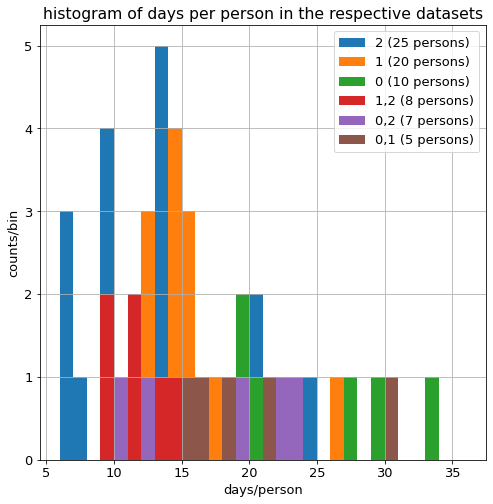

In [14]:
plt.rcParams.update({"figure.facecolor" : (1.0, 1.0, 1.0, 1.0), "savefig.facecolor": (1.0, 1.0, 1.0, 1.0)})
plt.rcParams["font.size"] = 13
plt.figure(figsize=(8,8))
plt.tight_layout()
plt.grid()
bin_width = int((person_count_max-person_count_min)*0.02)  # 50 bins
if bin_width < 1: bin_width = 1
bins = range(person_count_min, person_count_max, bin_width)
person_counts = {}
for ds in df["belongs_to_datasets"].unique():
    #print(ds)
    person_count_values = df2[df2["belongs_to_datasets"]==ds]["date"].values
    if len(person_count_values) > 0: 
        person_counts[ds] = (len(person_count_values), person_count_values, ds)

for pc in sorted(person_counts, key=lambda x: person_counts[x][0], reverse=True):
    #print(pc, person_counts[pc])
    if person_counts[pc][2] in dataset_labels:
        label_ = f"{person_counts[pc][2]}: {dataset_labels[person_counts[pc][2]]}"
    else:
        label_ = person_counts[pc][2]
    plt.hist(person_counts[pc][1], bins=bins, histtype="bar", label=f"{label_} ({len(person_counts[pc][1])} persons)")
plt.title(output[2])
plt.xlabel("days/person")
plt.ylabel("counts/bin")
    
plt.legend()
#plt.show()
plt.savefig(os.path.join(root_data_dir_name, output[0], output[1]))
print(os.path.join(root_data_dir_name, output[0], output[1]))